In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
import statsmodels.api as sm
from patsy import dmatrices as dm

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data=data.drop(['Unnamed: 0'],axis=1)

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
y,x=dm('Sales ~ TV + Radio + Newspaper-1' ,data=data,return_type='dataframe')

In [9]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


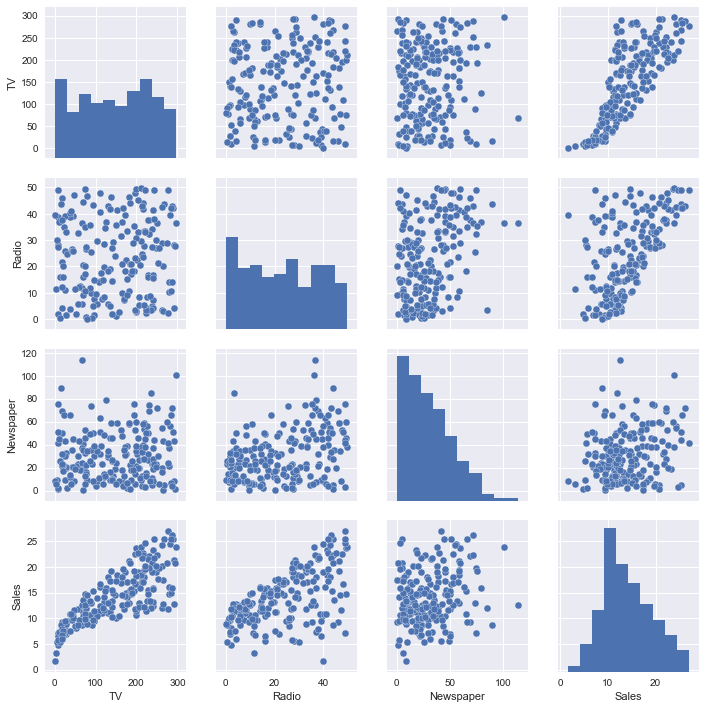

In [10]:
sns.pairplot(data)

### Simple Linear Regression

## TV ~ Sales

In [19]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split as tts

In [20]:
x1=data.iloc[:,0].values.reshape(-1,1)
y1=data.iloc[:,-1].values.reshape(-1,1)

In [21]:
x1_train,x1_test,y1_train,y1_test=tts(x1,y1 ,test_size=0.2)

In [22]:
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y1_pred=lr1.predict(x1_test)
y1_pred

array([[14.86839952],
       [20.44704325],
       [ 8.06885589],
       [15.30280211],
       [13.83040597],
       [13.31826819],
       [ 9.10227678],
       [17.28276336],
       [20.2641369 ],
       [19.81144368],
       [ 7.89966752],
       [16.93066864],
       [18.23844905],
       [ 7.48355557],
       [ 7.89509486],
       [20.84943722],
       [10.46035644],
       [17.46566971],
       [17.05870308],
       [ 9.04283222],
       [16.13045335],
       [20.1635384 ],
       [ 9.8659108 ],
       [ 8.55355773],
       [12.79241243],
       [13.6612176 ],
       [16.75233494],
       [18.265885  ],
       [14.14134677],
       [10.71185268],
       [10.78501522],
       [10.31860402],
       [19.42276768],
       [10.73014331],
       [20.68939416],
       [13.71151684],
       [17.28733602],
       [12.8061304 ],
       [10.35518529],
       [16.40024022]])

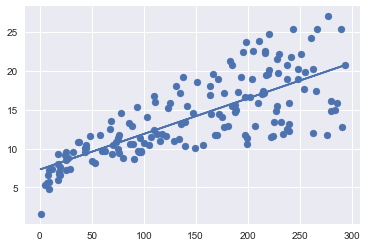

In [32]:
plt.scatter(x1_train.reshape(-1,1),y1_train.reshape(-1,1))
plt.plot(x1_train.reshape(-1,1),lr1.predict(x1_train).reshape(-1,1))
plt.show()

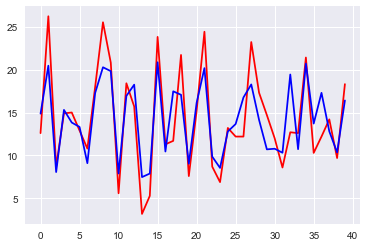

In [26]:
plt.plot(y1_test,color='r')
plt.plot(y1_pred,color='b')
plt.show()

###  Model Accuracy R2 value P-values

In [28]:
from sklearn.metrics import r2_score as r2

In [39]:
r2(y1_test,y1_pred)

0.7181319431952351

In [42]:
from statsmodels.formula.api import ols


In [44]:
model1=ols('Sales ~ TV',data=data).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        18:30:05   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [46]:
print(lr1.coef_,lr1.intercept_)

[[0.04572659]] [7.29607656]


In [47]:
model1.resid 

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
5     -0.246162
6      2.034050
7      0.453502
8     -2.641409
9     -5.930414
10    -1.574765
11     0.161290
12     1.036034
13    -1.967416
14     2.265178
15     6.078747
16     2.244422
17     3.990596
18     0.977871
19     0.565259
20     0.585404
21    -5.817792
22    -2.060077
23    -2.385209
24    -0.294126
25    -7.529976
26     1.174421
27    -2.546141
28     0.040290
29     0.111320
         ...   
170   -1.009426
171   -0.352371
172   -0.364312
173   -3.337764
174   -6.104742
175    6.804511
176    1.359305
177   -3.423330
178   -8.385982
179   -2.304661
180   -3.976831
181   -5.219349
182   -1.004153
183    5.495869
184   -1.497393
185    5.822395
186   -3.363955
187    1.183154
188   -4.728073
189   -1.221529
190    1.889709
191   -0.721610
192   -1.950224
193    4.638295
194    3.151171
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: floa

### Residul plot 

In [48]:
import statsmodels.api as sm

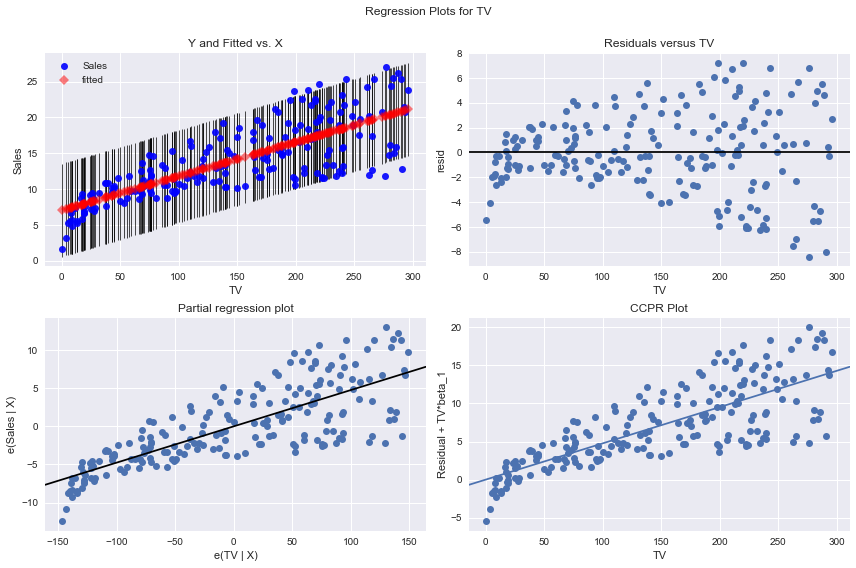

In [50]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, 'TV', fig=fig)

In [67]:
def linear(X):
    x1=X #data.iloc[:,0].values.reshape(-1,1)
    y1=data.iloc[:,-1].values.reshape(-1,1)
    x1_train,x1_test,y1_train,y1_test=tts(x1,y1 ,test_size=0.2)
    lr1=LinearRegression()
    lr1.fit(x1_train,y1_train)
    y1_pred=lr1.predict(x1_test)
    print('value of intercept and coefficent',lr1.intercept_,lr1.coef_)
    plt.scatter(x1_train.reshape(-1,1),y1_train.reshape(-1,1))
    plt.plot(x1_train.reshape(-1,1),lr1.predict(x1_train).reshape(-1,1))
    plt.show()
    print('Graph of y_predict(Blue) and test_y(Red)')
    plt.plot(y1_test,color='r')
    plt.plot(y1_pred,color='b')
    plt.show()
    print('Value of r^2, p-value ')
    model1=ols('Sales ~ X',data=data).fit()
    print(model1.summary())
    

Linearregression of sales vs TV
value of intercept and coefficent [6.98854006] [[0.04749809]]


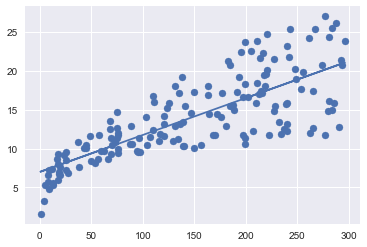

Graph of y_predict(Blue) and test_y(Red)


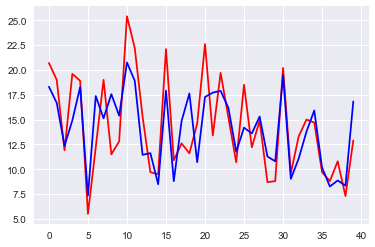

Value of r^2, p-value 
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        22:28:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.

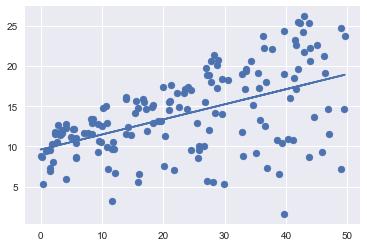

Graph of y_predict(Blue) and test_y(Red)


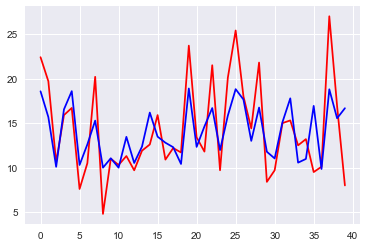

Value of r^2, p-value 
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           4.35e-19
Time:                        22:28:20   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.

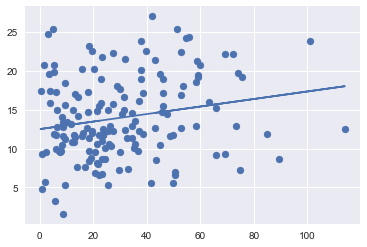

Graph of y_predict(Blue) and test_y(Red)


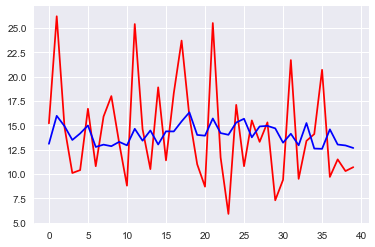

Value of r^2, p-value 
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 27 Jul 2021   Prob (F-statistic):            0.00115
Time:                        22:28:21   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.

In [68]:
for i in range(3):
    X=data.iloc[:,i].values.reshape(-1,1)
    print('Linearregression of sales vs',data.columns[i])
    linear(X)
    

In [54]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Multipal Linear Regression

In [74]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values.reshape(-1,1)
x_train,x_test,y_train,y_test=tts(x,y ,test_size=0.2)

In [75]:
LR=LinearRegression()

In [76]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
y_pred=LR.predict(x_test)

In [79]:
from sklearn.metrics import r2_score as R2
R2(y_test,y_pred)

0.759488011712242

In [81]:
from statsmodels.formula.api  import ols 
Model=ols('Sales ~ TV + Radio + Newspaper ',data=data).fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        23:58:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [82]:
from statsmodels.formula.api  import ols 
Model1=ols('Sales ~ TV + Radio',data=data).fit()
print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 29 Jul 2021   Prob (F-statistic):           4.83e-98
Time:                        00:59:51   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [83]:
from statsmodels.formula.api  import ols 
Model1=ols('Sales ~ TV + Radio + (TV*Radio)',data=data).fit()
print(Model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          6.68e-146
Time:                        01:01:19   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

In [84]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [88]:
from statsmodels.formula.api  import ols 
Model1=ols('Sales ~ TV +Radio+ (TV*Newspaper)',data=data).fit()
print(Model1.summary())
Model1.mse_model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     456.2
Date:                Fri, 30 Jul 2021   Prob (F-statistic):           9.06e-98
Time:                        01:33:16   Log-Likelihood:                -379.90
No. Observations:                 200   AIC:                             769.8
Df Residuals:                     195   BIC:                             786.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8731      0.401      9.655   

1223.5492160115514